# 6. Programmierübung: Monte Carlo Simulationen

<div style="display:flex;">
    <div style="text-align: left">
        Willkommen zur sechsten Programmierübung Einführung in Python 3.
    </div>
    <img style="float: right; margin: 0px 15px 15px 0px" src="https://www.python.org/static/img/python-logo-large.c36dccadd999.png?1576869008" width="100" />
</div>

Wenn du Fragen oder Verbesserungsvorschläge zum Inhalt oder Struktur der Notebooks hast, dann kannst du mir gerne eine E-Mail an Phil Keier ([p.keier@hbk-bs.de](mailto:p.keier@hbk-bs.de?subject=[SigSys]%20Feedback%20Programmierübung&amp)) schreiben.

Link zu einem Python Spickzettel: [hier](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)

Der Großteil des Python-Tutorials stammt aus der Veranstaltung _Deep Learning Lab_ und von [www.python-kurs.eu](https://www.python-kurs.eu/python3_kurs.php) und wurde für _Signale und Systeme_, sowie _Einführung in die Programmierung für Nicht Informatiker_ angepasst.

---

## (Continues) Uniform Distribution

Die gleichmäßige Verteilung zeigt sich durch ihre charakteristische Form eines Rechtecks mit dem Flächeninhalt 1 = 100%.  
Technisch gesehen ist diese Art der Verteilung keineswegs exotisch, da PCGs ihr üblicherweise folgen.

Eine Uniform Distribution setzt sich aus denselben zwei Parametern zusammen wie die Normalverteilung:  
$\mu$ als Mittelwert und $\sigma$ als Standardabweichung vom Mittelwert.  

Allerdings interpretieren die Libraries NumPy & SciPy diese Werte etwas anders:  
$\mu$ entspricht hier dem kleinsten Wert, während $\sigma$ den größten Wert markiert.

Die folgende Grafik verdeutlicht die Verteilung mit $\mu = 0$ & $\sigma = 1$:


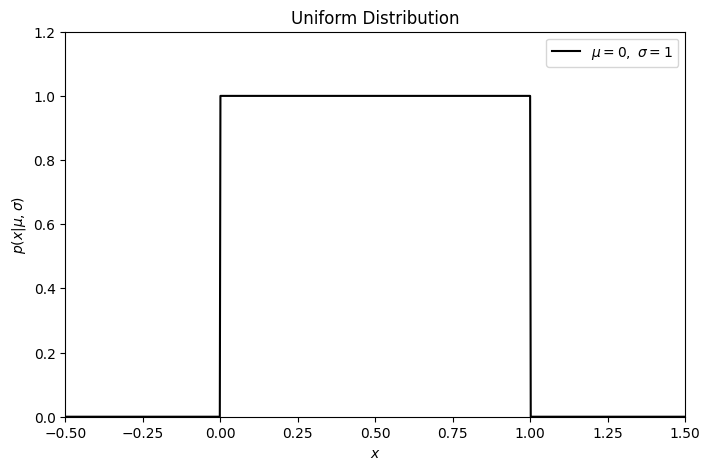

In [1]:
import numpy as np
from scipy.stats import uniform # Import scipys uniform
import matplotlib.pyplot as plt

# Define the distribution parameters to be plotted
sigma = 1
mu = 0
x = np.linspace(-0.5, 1.5, 1000)


# plot the distributions
fig, ax = plt.subplots(figsize=(8, 5))

dist = uniform(mu, sigma)

plt.plot(x, dist.pdf(x), c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))

plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, \sigma)$')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

## Random Sampling

Wie man aus Verteilungen sampelt, ist bereits aus dem Kapitel zu den PCGs bekannt – schließlich sind diese uniform verteilt.

Das folgende Beispiel zieht drei zufällige Zahlen aus einer PCG-uniformen Verteilung mittels NumPy:

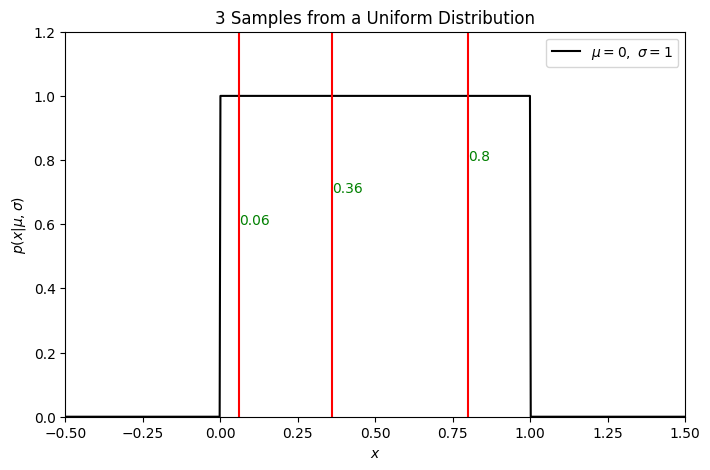

In [2]:
# Parameters
mu = 0
sigma = 1

# Get a 3 random samples
rand = np.random.default_rng(5000)
uniform_samples = rand.uniform(mu, sigma, 3)

# Linespace
x = np.linspace(-0.5, 2, 1000)

# Get uniform from linespace
dist = uniform(mu, sigma)

# Plot Uniform
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x, dist.pdf(x), c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))

# Plot samples
step = 0.1
for u in uniform_samples:
    u = np.round(u, decimals=2)
    plt.axvline(u, color='r')
    plt.text(u, .5+step, u, color='g')
    step += 0.1

# Cosmetics
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, \sigma)$')
plt.title('3 Samples from a Uniform Distribution')

plt.legend()
plt.show()

Random Sampling funktioniert selbstverständlich auch auf Normalverteilungen. Beispiel:

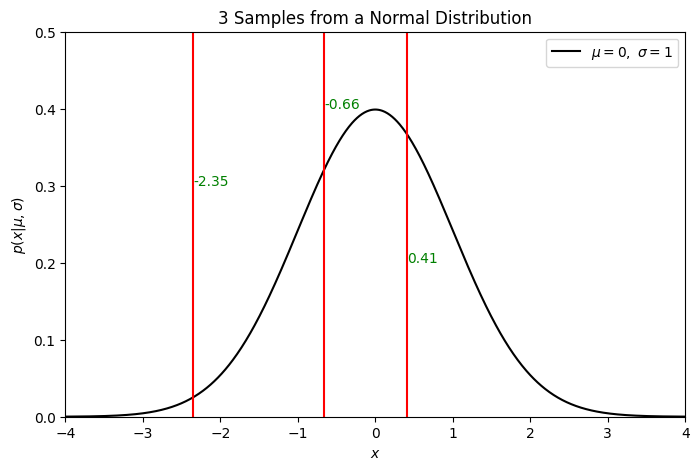

In [3]:
# Import scipys norm
from scipy.stats import norm 

#Parameters
mu = 0
sigma = 1

# Get a 3 random samples
rand = np.random.default_rng(5000)
uniform_samples = rand.normal(mu, sigma, 3)

# Linespace
x = np.linspace(-4, 4, 1000)

# Get uniform from linespace
dist = norm(mu, sigma)

# Plot Uniform
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(x, dist.pdf(x), c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))

# Plot samples
step = 0.1
for u in uniform_samples:
    u = np.round(u, decimals=2)
    plt.axvline(u, color='r')
    plt.text(u, .1+step, u, color='g')
    step += 0.1

# Cosmetics
plt.xlim(-4, 4)
plt.ylim(0, .5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, \sigma)$')
plt.title('3 Samples from a Normal Distribution')

plt.legend()
plt.show()

## Monte-Carlo-Simulationen

Monte-Carlo-Simulationen werden in vielen wissenschaftlichen und finanziellen (Forschungs-)Feldern angewandt, um stochastisch relevante Probleme auf vergleichsweise elegante Weise zu lösen. Insbesondere lassen sich damit Zufallsereignisse unterschiedlichster Verteilungen miteinander kombinieren. So kann man beispielsweise die Zahl $\pi$ approximieren.

Dazu betrachte folgende Darstellung:

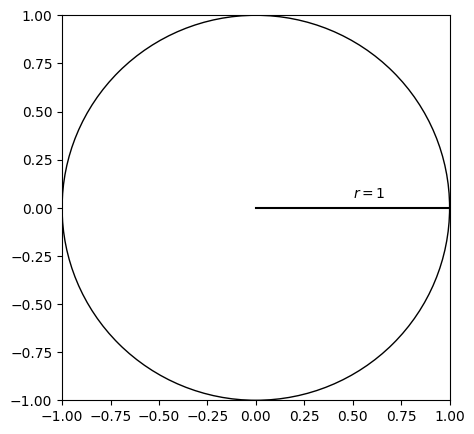

In [4]:
circle = plt.Circle((0, 0), 1, color='black', fill=False)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(circle)
ax.plot(np.linspace(0,1), np.zeros(50), color='black')
ax.text(0.5, 0.05, "$r = 1$")

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

Vorliegend ist der Einheitskreis mit Radius = 1, dessen Flächeninhalt sich zu  
$$A_{circle} = \pi$$ ergibt.

Das umgebende Rechteck besitzt die Seitenlänge  
$a = r \cdot 2 = 2$, woraus ein Flächeninhalt von  
$A_{square} = 2 \cdot 2 = 4$ folgt.

Damit ergibt sich das Verhältnis
$$
\frac{A_{circle}}{A_{square}} = \frac{\pi}{4}
$$

Jeder Punkt $(x, y)$ in diesem Diagramm ist gleichwahrscheinlich, also uniform verteilt.  
Mittels Monte-Carlo-Methodik können wir nun den Wert von $\pi\$ approximieren.  
Nach einfachem Umstellen erhalten wir:

$$
\pi = 4 \cdot \frac{A_{circle}}{A_{square}}
$$

Nacheinander werden dafür zufällig gleichverteilte $x$- und $y$-Werte gezogen.

Für das folgende Beispiel nutzen wir bewusst nur wenige Werte, um die Darstellung nicht zu überladen:


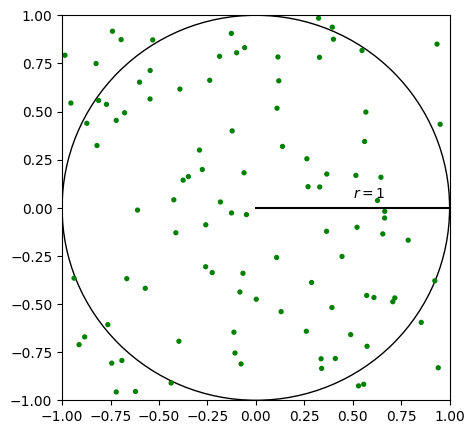

In [5]:
# Get Uniform x, y samples
rand = np.random.default_rng(42) # Set fixed Value
x_rand = rand.uniform(-1, 1, 100)
y_rand = rand.uniform(-1, 1, 100)

# Plot 
circle = plt.Circle((0, 0), 1, color='black', fill=False)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(circle)
ax.plot(np.linspace(0,1), np.zeros(50), color='black')
ax.text(0.5, 0.05, "$r = 1$")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot samples as small circles
for x, y in zip(x_rand, y_rand):
    c = plt.Circle((x,y), 0.01, color='green')
    ax.add_patch(c)

plt.show()

Um zu bestimmen, ob einer der Werte im Kreis liegt, nutzen wir die parametrisierte Kreisgleichung:

$$
x^2 + y^2 = r,\quad r = 1
$$

Mittels dieser lassen sich die Werte elegant in zwei Kategorien einordnen:  
„im Kreis (`circle`)" und „im Rechteck (`square`)".


In [7]:
# reserve two arrays
circle_coords = []
square_coords = []

for x,y in zip(x_rand, y_rand):
    # calculate distance from origin
    dist_from_origin = x**2 + y**2

    # if distance smaller or equal than 1, the point is in the circle
    if dist_from_origin <= 1:
        circle_coords.append((x,y))

    # by definition is every point in the square
    square_coords.append((x,y))

Mittels der Länge der beiden Listen lässt sich dementsprechend $\pi$ approximieren:


In [8]:
pi = 4 * len(circle_coords) / len(square_coords)
print(f"Pi = {pi}")
print(f"Difference to real Value {np.pi - pi}")

Pi = 3.12
Difference to real Value 0.02159265358979301


Plotten wir im Folgenden die 100 zufällig gleichverteilten Werte:

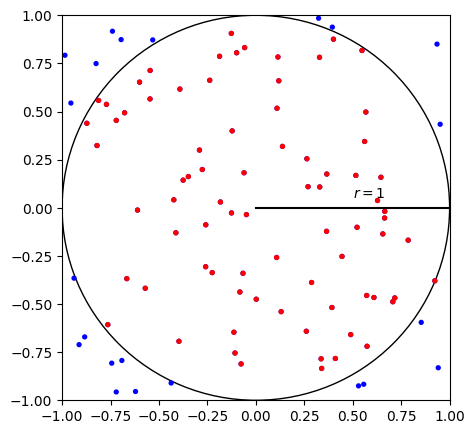

In [9]:
# Plot 
circle = plt.Circle((0, 0), 1, color='black', fill=False)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(circle)
ax.plot(np.linspace(0,1), np.zeros(50), color='black')
ax.text(0.5, 0.05, "$r = 1$")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot samples not in the circle
for coord in square_coords:
    c = plt.Circle(coord, 0.01, color='blue')
    ax.add_patch(c)

# Plot samples in the circle
for coord in circle_coords:
    c = plt.Circle(coord, 0.01, color='red')
    ax.add_patch(c)

plt.show()

Um einen genaueren Wert für $\pi$ zu erhalten, muss lediglich die Anzahl der Samples erhöht werden (hier: 1 Million).

Da im Folgenden auf eine grafische Darstellung verzichtet wird, lässt sich die Berechnung darauf vereinfachen, lediglich zu zählen, wie viele Punkte im Kreis liegen – die konkreten Koordinaten sind dabei nicht mehr von praktischem Nutzen:


In [10]:
# Get Uniform x, y samples
sample_size = 1_000_000
rand = np.random.default_rng(42) # Set fixed Value
x_rand = rand.uniform(-1, 1, sample_size)
y_rand = rand.uniform(-1, 1, sample_size)

# reserve two arrays
in_circle = 0
in_square = 0

for x,y in zip(x_rand, y_rand):
    # calculate distance from origin
    dist_from_origin = x**2 + y**2

    # if distance smaller or equal than 1, the point is in the circle
    if dist_from_origin <= 1:
        in_circle += 1

    # by definition is every point in the square
    in_square += 1

pi = 4 * in_circle / in_square
print(f"Pi = {pi}")
print(f"Difference to real Value {np.pi - pi}")

Pi = 3.14178
Difference to real Value -0.00018734641020667908


### Aufgabe – Arbeitszeit abschätzen

*15 Punkte*

Du befindest dich erneut in der Situation, dass dein Chef dich beauftragt, zwei wichtige Aufgaben bis zum Ende des Arbeitstages zu bearbeiten. Gleichzeitig bist du abends auf einem Grillfest mit deinen Freunden verabredet, das um 18 Uhr beginnt.  

Da du nun im Zwiespalt stehst, sowohl deinen beruflichen Aufgaben nachzukommen als auch das Grillfest pünktlich zu erreichen, fragst du dich, wie hoch die Wahrscheinlichkeit ist, dass du es in den nächsten 9 Stunden schaffst, beides unter einen Hut zu bringen.

Nach einigen Überlegungen stellst du Folgendes fest:

- Für die erste Aufgabe benötigst du zwischen 1–5 Stunden.  
- Für die zweite Aufgabe benötigst du zwischen 2–6 Stunden.  
- Egal wie schnell du eine Aufgabe erledigst, es gibt keine Auswirkungen auf die andere Aufgabe (die Aufgaben sind unabhängig voneinander).

Nun sollst du die Wahrscheinlichkeit berechnen, dass du pünktlich beim Grillfest ankommst.

Gehe dazu wie folgt vor:

1. Nimm an, dass beide Aufgaben gleichmäßig verteilt sind, und speichere die Verteilungen in den Variablen `exc1` & `exc2`.
2. Verwende eine geeignete Anzahl an Samples und speichere diese in der Variablen `sims`.
3. Speichere die Wahrscheinlichkeit, dass du pünktlich zum Grillfest kommst, in der Variablen `chance` mit einer Genauigkeit von zwei Nachkommastellen.
4. Plotte die Verteilungen der Aufgabenzeiten und beziehe dabei die Variable `chance` ein, z.B. als Annotation oder Beschriftung.

In der Markdownzelle (Keine Antwort = 0 Punkte):
- Stelle dein Ergebnis begründet dar.
- Interpretiere deinen Plot.
- Erkläre in eigenen Worten, warum dein Ergebnis aussagekräftig ist.

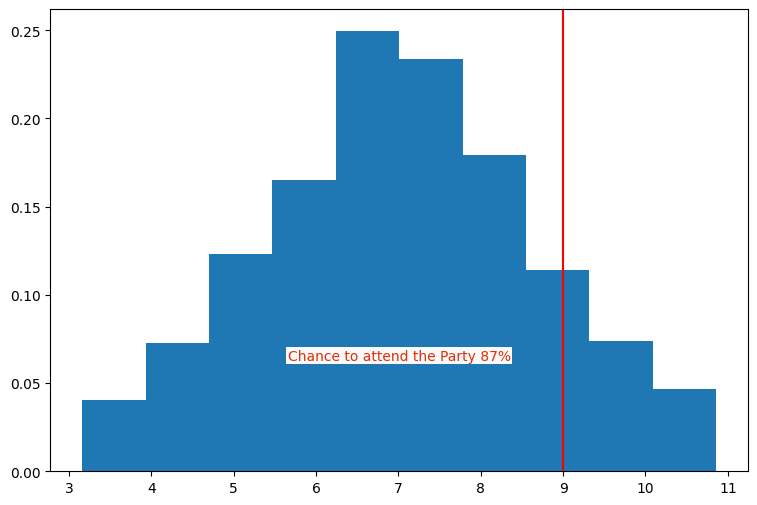

In [9]:
import numpy as np
rand = np.random.default_rng(42) # Use this rng!
# BEGIN SOLUTION
import matplotlib.pyplot as plt
sims = 1_000 # 1 Punkt

# 2 Punkte
exc1 = rand.uniform(1,5,sims) 
exc2 = rand.uniform(2,6,sims)

duration = exc1 + exc2 # 1 Punkt
chance = float(np.round((duration > 9).sum()/sims, decimals=2)) # 1 Punkt

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(duration, density=True) # 1 Punkt
ax.axvline(9, color='r') # 1 Punkt
ax.text(0.5,0.25,
        f"Chance to attend the Party {(1-chance)*100:.0f}%",
        ha='center', va='center', transform=ax.transAxes,
        bbox={'facecolor':'#fafafa','alpha':1,'edgecolor':'none','pad':1},
        color='#de2e0b'
    )
plt.show()
# END SOLUTION

# BEGIN SOLUTION
# END SOLUTION

In [13]:
# Hier werden ihre Lösungen getestet...
import math
assert math.isclose(chance, 0.13, rel_tol=0.1)

### BEGIN HIDDEN TESTS
assert sims > 999
assert sims < 10_000_000

trand = np.random.default_rng(42)

texc1 = trand.uniform(1,5,sims) 
texc2 = trand.uniform(2,6,sims)

assert np.array_equal(exc1, texc1)
assert np.array_equal(exc2, texc2)
### END HIDDEN TESTS

### Aufgabe – Simulation einer Körpergewichtszunahme

*25 Punkte*

Gegeben sind die nach Altersgruppen aufgeschlüsselten Durchschnittskörpergewichte (in kg) von Männern in Deutschland.  
Quelle: [Statistisches Bundesamt](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Gesundheit/Gesundheitszustand-Relevantes-Verhalten/Tabellen/koerpermasse-maenner.html)

Ziel ist es, mittels Monte-Carlo-Simulation den mittleren wöchentlichen Gewichtszuwachs zu bestimmen und die Wahrscheinlichkeit zu finden, dass ein Durchschnittsmann innerhalb einer Woche 3 kg abnimmt.

**Vorgehensweise:**

1. Bestimme das arithmetische Mittel der Durchschnittsgewichte über die Altersgruppen und speichere diesen Wert in `avg_weight` mit einer Genauigkeit von 1 Dezimalstelle.
2. Wähle eine geeignete Anzahl an Samples (`sims`) für die Simulation.
3. Nimm an, dass das Durchschnittsgewicht normalverteilt ist, mit einer Standardabweichung von 5% des Durchschnittsgewichts, und speichere die simulierten Werte in `men_normal`.
4. Nimm an, dass die tägliche Gewichtsschwankung eines Mannes gleichverteilt zwischen ±2.5 kg ist.
5. Simuliere die Gewichtszunahmen/-abnahmen für eine Woche (7 Tage) und speichere die Ergebnisse in `gain_week`.
6. Berechne die durchschnittliche wöchentliche Gewichtszunahme/-abnahme und speichere das Ergebnis in `duration`.
7. Bestimme die Wahrscheinlichkeit, dass ein Mann 3 kg oder mehr abnimmt, und speichere sie in `gain_percent`.
8. Plotte die Verteilung der simulierten Werte und markiere die relevanten Kennzahlen (Durchschnitt, Schwankungsbereich, Wahrscheinlichkeit).

In der Markdownzelle (Keine Antwort = 0 Punkte):
- Bewerte & Beurteile die gegebenen Daten, sowie Quelle.
- Erkläre & Interpretiere deinen Plot.
- Bewerte die angewandte Methodik im Zusammenhang mit der Aufgabe, beziehe dein Ergebnis anschaulich mit ein.
- Beurteile anhand deiner Simulation den [Bild Artikel](https://www.bild.de/leben-wissen/psychologie-liebe/gewichtszunahme-in-der-ehe-das-stimmt-vor-allem-fuer-maenner-67d2e348aae7056ac7dd201d) - *"Ehe macht dick – vor allem die Männer"*

In [14]:
# Given
avg_weight_per_men = {
    "18 - 20": 77.9,
    "20 - 25": 80.5,
    "25 - 30": 83.3,
    "30 - 35": 85.6,
    "35 - 40": 86.7,
    "40 - 45": 88.1,
    "45 - 50": 89.8,
    "50 - 55": 89.0,
    "55 - 60": 88.8,
    "60 - 65": 87.9,
    "65 - 70": 86.7,
    "70 - 75": 85.3,
    "75+": 81.0
}

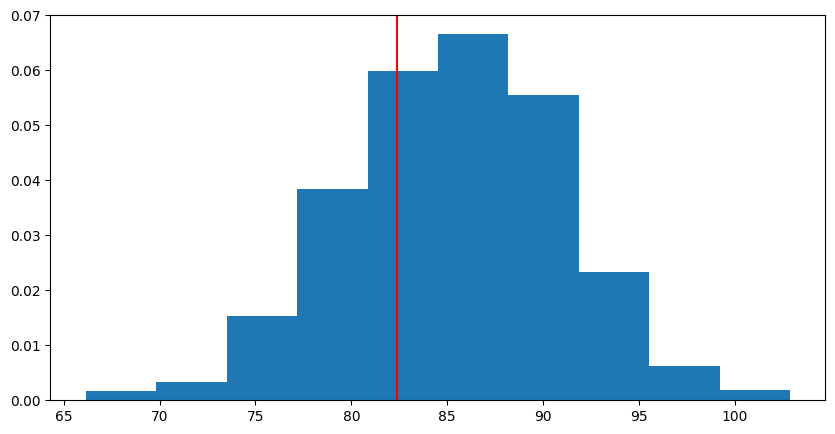

0.31


In [88]:
rand = np.random.default_rng(420) # Use this rng!

# BEGIN SOLUTION
avg_weight = np.round(np.mean(list(avg_weight_per_men.values())), decimals=1) # 1 Punkt

sims = 1_000 # 1 Punkt

# 3 Punkte
sigma = np.round(avg_weight * 0.05, decimals=1)
men_normal = rand.normal(avg_weight, sigma, sims)
gain_week = [
    rand.uniform(-2.5, 2.5, sims)
    for _ in range(7)
]

# Sum up 2 Punkte
duration = np.zeros(sims)
for gain in gain_week:
    duration += gain
duration += men

gain_percent = float(np.round((duration < avg_weight-3).sum()/sims, decimals=2)) # 1 Punkt

plt.figure(figsize=(10,5))
plt.hist(duration, density=True) # 1 Punkt
plt.axvline(avg_weight-3, color='r') # 1 Punkt
plt.show()
print(gain_percent)
# END SOLUTION

# BEGIN SOLUTION
# END SOLUTION

In [94]:
# Hier werden ihre Lösungen getestet...
import math
assert math.isclose(float(gain_percent), 0.3, rel_tol=0.1)

### BEGIN HIDDEN TESTS
assert sims > 499
assert sims < 2_001

trand = np.random.default_rng(420)

t_sigma = np.round(avg_weight * 0.05, decimals=1)
t_men = trand.normal(avg_weight, sigma, sims)
t_gain_week = [
    trand.uniform(-2.5, 2.5, sims)
    for _ in range(7)
]

assert math.isclose(sigma, t_sigma, rel_tol=0.1)

for el1, el2 in zip(gain_week, t_gain_week):
    assert np.array_equal(el1, el2)

assert np.array_equal(t_men, men)

t_duration = np.zeros(sims)
for gain in t_gain_week:
    t_duration += gain
t_duration += t_men

assert np.array_equal(t_duration, duration)
### END HIDDEN TESTS